In [1]:
import cv2
import io
from skimage import io
from skimage.measure import shannon_entropy
import numpy as np
from numpy.fft import fft2, fftshift
import os
import matplotlib.pyplot as plt
from google.colab import drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


{'edgeDensity': 0.4, 'entrop': 0.3, 'col_variance': 0.2, 'spatial': 0.1}
{'edgeDensity': [], 'entrop': [], 'col_variance': [], 'spatial': []}
Img : /content/drive/MyDrive/AI Art/13_IM_A.jpg
 Edge Den: 2.7675708110907498
 Entrop: 7.301619496556836
 Variance Colour: 2678.3374265964144
 Spatial Freq: 5932.526708876296
 Complex Score: 0.3319296098651008  Category: Med Complex


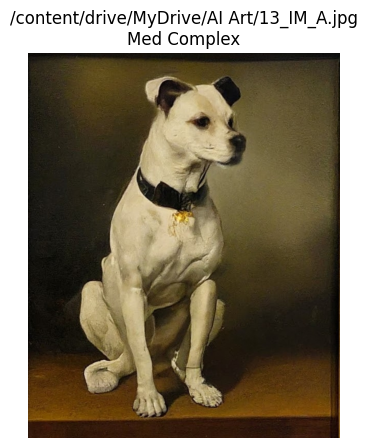

Img : /content/drive/MyDrive/AI Art/12_DAL_A.jpg
 Edge Den: 9.301684670781894
 Entrop: 5.812174070098636
 Variance Colour: 2298.9871208320833
 Spatial Freq: 7068.592483713409
 Complex Score: 0.30814230990890024  Category: Low Complex


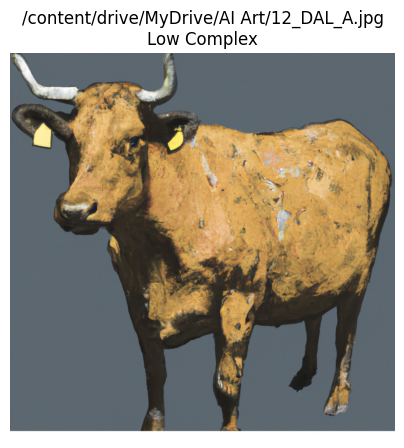

Img : /content/drive/MyDrive/AI Art/15_IM_A.jpg
 Edge Den: 1.675658946366017
 Entrop: 7.020496372864556
 Variance Colour: 2784.124022641429
 Spatial Freq: 5658.127119231187
 Complex Score: 0.2548944134318526  Category: Low Complex


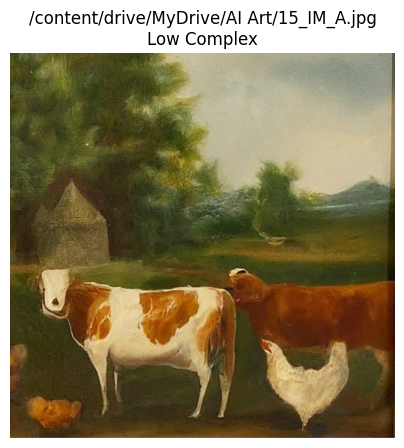

Img : /content/drive/MyDrive/AI Art/11_DAL_A.jpg
 Edge Den: 13.1693158436214
 Entrop: 6.114765972176454
 Variance Colour: 2280.277154408493
 Spatial Freq: 8034.076639250656
 Complex Score: 0.4998322401618227  Category: Med Complex


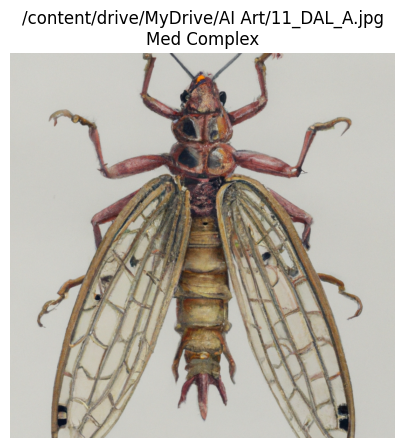

Img : /content/drive/MyDrive/AI Art/1_IM_P.jpg
 Edge Den: 7.486042412741459
 Entrop: 7.546959541275382
 Variance Colour: 3072.6872503602826
 Spatial Freq: 7960.524549020663
 Complex Score: 0.5887024057284469  Category: Med Complex


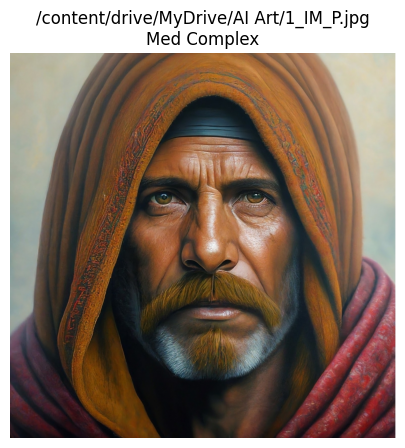

Img : /content/drive/MyDrive/AI Art/8_DAL_P.jpg
 Edge Den: 2.2789094650205763
 Entrop: 6.578148602880243
 Variance Colour: 3546.5877552438888
 Spatial Freq: 4826.598721960564
 Complex Score: 0.2567099702170966  Category: Low Complex


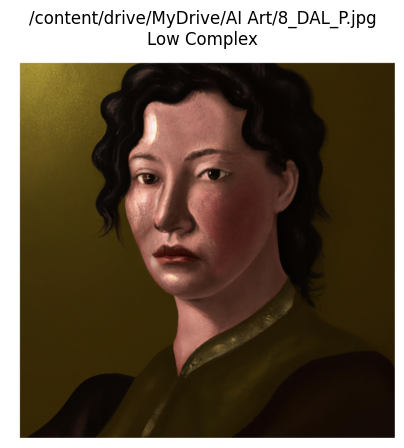

Img : /content/drive/MyDrive/AI Art/5_IM_P.jpg
 Edge Den: 3.1374533439393013
 Entrop: 7.226912626139759
 Variance Colour: 2451.9637103144205
 Spatial Freq: 6025.321661490869
 Complex Score: 0.3163356004372396  Category: Low Complex


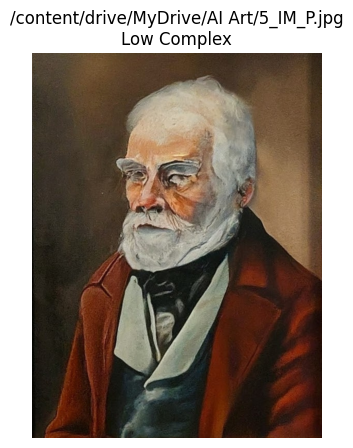

Img : /content/drive/MyDrive/AI Art/6_DAL_P.jpg
 Edge Den: 2.1221579218106994
 Entrop: 6.614615226688443
 Variance Colour: 3183.2897792687704
 Spatial Freq: 4849.288370498738
 Complex Score: 0.228734385193197  Category: Low Complex


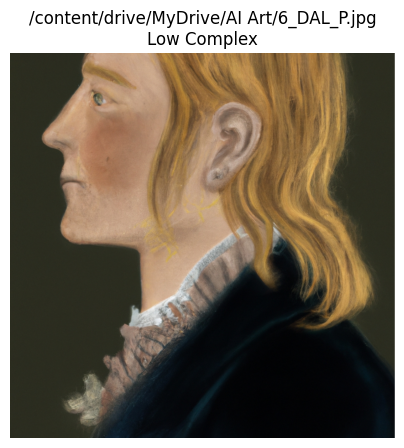

Img : /content/drive/MyDrive/AI Art/15_DAL_F.jpg
 Edge Den: 10.262525720164609
 Entrop: 6.653060906566328
 Variance Colour: 3946.32166850346
 Spatial Freq: 8276.537308140465
 Complex Score: 0.6168656032627153  Category: Med Complex


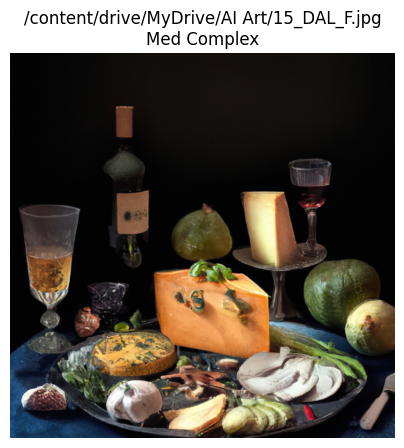

Img : /content/drive/MyDrive/AI Art/18_IM_F.jpg
 Edge Den: 10.636638679278704
 Entrop: 7.719234405263888
 Variance Colour: 4626.754879012376
 Spatial Freq: 13638.090089904446
 Complex Score: 0.9118582645372862  Category: High Complex


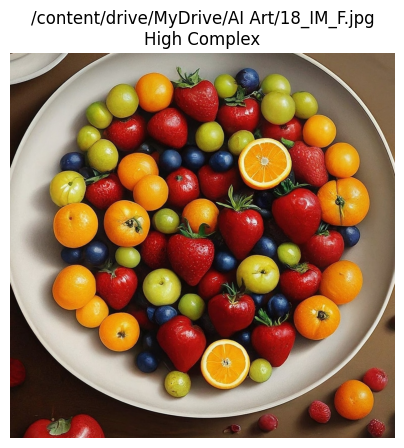

Img : /content/drive/MyDrive/AI Art/16_IM_F.jpg
 Edge Den: 6.921386180896291
 Entrop: 7.129768327010294
 Variance Colour: 2078.584700633624
 Spatial Freq: 8596.794756488449
 Complex Score: 0.43261902362586185  Category: Med Complex


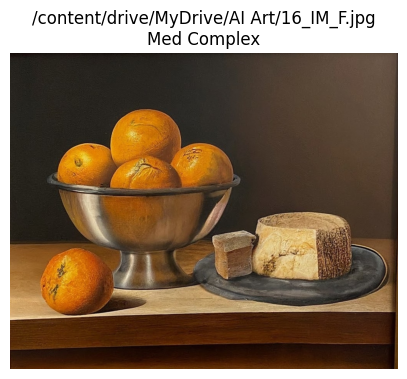

Img : /content/drive/MyDrive/AI Art/21_DAL_F.jpg
 Edge Den: 9.411869855967078
 Entrop: 6.272115748607324
 Variance Colour: 3349.693799932491
 Spatial Freq: 8291.335444179396
 Complex Score: 0.4806746897920493  Category: Med Complex


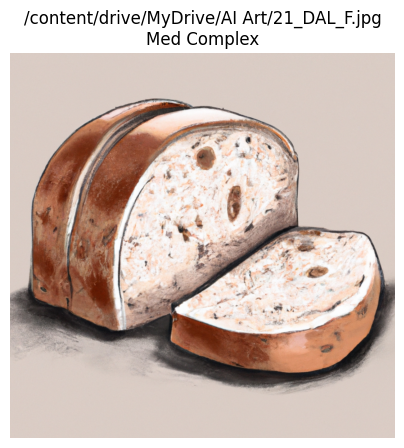

In [45]:
path = '/content/drive/MyDrive/AI Art'
f_path = [os.path.join(path, f) for f in os.listdir(path)]

imgimgs = []

for img_path in f_path:
    img = io.imread(img_path)
    imgimgs.append(img)

i_rgb_gray = []

for img in imgimgs:
  gray_ig = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  i_rgb_gray.append(gray_ig)

def edgeDensity(i_rgb_gray):
  edge = cv2.Canny(i_rgb_gray, 100, 200)
  sum_edge = edge.sum()
  e_den = sum_edge / (i_rgb_gray.shape[0] * i_rgb_gray.shape[1])
  return e_den

def entrop(imgs_grey):
  entropy = shannon_entropy(imgs_grey)
  return entropy

def col_variance(imgs_rgb):
  var = np.var(imgs_rgb, axis=(0, 1))
  var_total = np.mean(var)
  return var_total

def spatial(imgs_grey):
  spati_freq = np.mean(np.abs(fftshift(fft2(imgs_grey))))
  return spati_freq


weight = {}

weight['edgeDensity'] = .4
weight['entrop'] = .3
weight['col_variance'] = .2
weight['spatial'] = .1

print(weight)

metrics = {'edgeDensity': [], 'entrop' : [], 'col_variance' : [], 'spatial' : []}

print(metrics)

for i, (img, img_gray) in enumerate (zip(imgimgs, i_rgb_gray)):
  metrics['edgeDensity'].append(edgeDensity(img_gray))
  metrics['entrop'].append(entrop(img_gray))
  metrics['col_variance'].append(col_variance(img))
  metrics['spatial'].append(spatial(img_gray))

norm_mets = {}

for met, val in metrics.items():
  norm_mets[met] = (np.array(val) - np.min(val)) / (np.max(val) - np.min(val))

complex_score = []

for i in range(len(imgimgs)):
  scores = sum(weight[met] * norm_mets[met] [i] for met in weight)
  complex_score.append(scores)


category = []
for scores in complex_score:
  if scores <= 0.33:
    category.append("Low Complex")
  elif scores <= 0.66:
    category.append("Med Complex")
  else:
    category.append("High Complex")

for i, im_file in enumerate(f_path):
  print(f"Img : {im_file}")
  print(f" Edge Den: {metrics['edgeDensity'][i]}")
  print(f" Entrop: {metrics['entrop'][i]}")
  print(f" Variance Colour: {metrics['col_variance'][i]}")
  print(f" Spatial Freq: {metrics['spatial'][i]}")
  print(f" Complex Score: {complex_score[i]}", f" Category: {category[i]}")

  plt.figure(figsize=(5, 5))
  plt.imshow(imgimgs[i])
  plt.title(f"{im_file}\n{category[i]}")
  plt.axis('off')
  plt.show()